In [1]:
import numpy as np

# Set up random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(1)

# Generate the simulated data
x = rng.normal(size=100)  # Generate 100 random values for x from a normal distribution
y = x - 2 * x**2 + rng.normal(size=100)  # Generate y based on the equation with additional noise


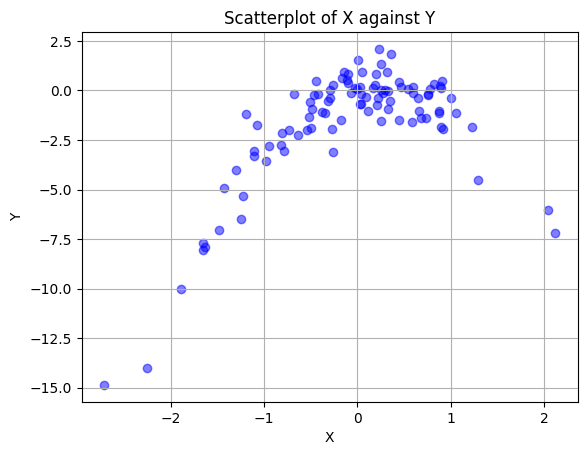

The scatterplot shows a non-linear relationship between X and Y. The data points appear to follow a parabolic pattern, indicating that Y is influenced by the square of X, as defined in the equation Y = X - 2X^2. The added noise causes some random variation around this curve.


In [2]:
import matplotlib.pyplot as plt

# Create the scatterplot of X against Y
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title("Scatterplot of X against Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Comment on the findings
print("The scatterplot shows a non-linear relationship between X and Y. The data points appear to follow a parabolic pattern, "
      "indicating that Y is influenced by the square of X, as defined in the equation Y = X - 2X^2. The added noise causes some "
      "random variation around this curve.")

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': x, 'Y': y})

# Function to perform LOOCV
def loocv(df, degree):
    n = len(df)
    loo_errors = []
    for i in range(n):
        # Split data into training and validation sets
        X_train = df.drop(index=i)['X'].values.reshape(-1, 1)
        y_train = df.drop(index=i)['Y'].values
        X_val = df.iloc[[i]]['X'].values.reshape(-1, 1)
        y_val = df.iloc[[i]]['Y'].values

        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_val_poly)
        error = mean_squared_error(y_val, y_pred)
        loo_errors.append(error)

    return np.mean(loo_errors)

# Calculate LOOCV errors for different models
degrees = [1, 2, 3, 4]
loocv_errors = [loocv(df, degree) for degree in degrees]

# Print the results
for i, degree in enumerate(degrees):
    print(f"LOOCV error for model with degree {degree}: {loocv_errors[i]}")

# (d) Which of the models in (c) had the smallest LOOCV error? Is this what you expected?
#  Compare the LOOCV errors and determine which model has the smallest error.
#  Based on how the data was generated, the model with degree 2 is likely to have the lowest error.
min_error = min(loocv_errors)
min_error_degree = degrees[loocv_errors.index(min_error)]

print(f"\nModel with the smallest LOOCV error: Degree {min_error_degree} (Error: {min_error})")
     

LOOCV error for model with degree 1: 6.633029839181983
LOOCV error for model with degree 2: 1.1229368563419697
LOOCV error for model with degree 3: 1.301796548935887
LOOCV error for model with degree 4: 1.3323942694179354

Model with the smallest LOOCV error: Degree 2 (Error: 1.1229368563419697)


In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Set a new random seed
rng = np.random.default_rng(42)  # Using a different seed

# Generate the simulated data again with the new seed
x = rng.normal(size=100)  # Generate 100 random values for x from a normal distribution
y = x - 2 * x**2 + rng.normal(size=100)  # Generate y based on the equation with additional noise

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': x, 'Y': y})

# Function to perform LOOCV
def loocv(df, degree):
    n = len(df)
    loo_errors = []
    for i in range(n):
        # Split data into training and validation sets
        X_train = df.drop(index=i)['X'].values.reshape(-1, 1)
        y_train = df.drop(index=i)['Y'].values
        X_val = df.iloc[[i]]['X'].values.reshape(-1, 1)
        y_val = df.iloc[[i]]['Y'].values

        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_val_poly)
        error = mean_squared_error(y_val, y_pred)
        loo_errors.append(error)

    return np.mean(loo_errors)

# Calculate LOOCV errors for different models
degrees = [1, 2, 3, 4]
loocv_errors = [loocv(df, degree) for degree in degrees]

# Print the results
for i, degree in enumerate(degrees):
    print(f"LOOCV error for model with degree {degree}: {loocv_errors[i]}")

# Determine the model with the smallest LOOCV error
min_error = min(loocv_errors)
min_error_degree = degrees[loocv_errors.index(min_error)]

print(f"\nModel with the smallest LOOCV error: Degree {min_error_degree} (Error: {min_error})")


LOOCV error for model with degree 1: 4.2518828656027745
LOOCV error for model with degree 2: 0.9639984632709347
LOOCV error for model with degree 3: 0.9912711879229302
LOOCV error for model with degree 4: 1.0181801043809116

Model with the smallest LOOCV error: Degree 2 (Error: 0.9639984632709347)
